# Aurora Policing Project

## About the policing data

Throughout this project, I will be analyzing a dataset of traffic stops in Aurora Colorado that was collected by the "Stanford Open Policing Project". [Stanford Open Policing Project Data](https://openpolicing.stanford.edu/data/)



<table>
  <tr>
    <td>Column name</td>
    <td>Column meaning</td>
    <td>Example value</td>
  </tr>
  <tr>
    <td>raw_row_number</td>
    <td>An number used to join clean data back to the raw data</td>
    <td>38299</td>
  </tr>
  <tr>
    <td>date</td>
    <td>The date of the stop, in YYYY-MM-DD format. Some states do not provide
    the exact stop date: for example, they only provide the year or quarter in
    which the stop occurred. For these states, stop_date is set to the date at
    the beginning of the period: for example, January 1 if only year is
    provided.</td>
    <td>"2017-02-02"</td>
  </tr>
  <tr>
    <td>time</td>
    <td>The 24-hour time of the stop, in HH:MM format.</td>
    <td>20:15</td>
  </tr>
  <tr>
    <td>location</td>
    <td>The freeform text of the location. Occasionally, this represents the
    concatenation of several raw fields, i.e. street_number, street_name</td>
    <td>"248 Stockton Rd."</td>
  </tr>
  <tr>
    <td>lat</td>
    <td>The latitude of the stop. If not provided by the department, we
    attempt to geocode any provided address or location using
    Google Maps. Google Maps returns a "best effort" response, which may not
    be completely accurate if the provided location was malformed or
    underspecified. To protect against suprious responses, geocodes more than
    4 standard deviations from the median stop lat/lng are set to NA.
    <td>72.23545</td>
  </tr>
  <tr>
    <td>lng</td>
    <td>The longitude of the stop. If not provided by the department, we
    attempt to geocode any provided address or location using
    Google Maps. Google Maps returns a "best effort" response, which may not
    be completely accurate if the provided location was malformed or
    underspecified. To protect against suprious responses, geocodes more than
    4 standard deviations from the median stop lat/lng are set to NA.
    </td>
    <td>115.2808</td>
  </tr>
  
  <tr>
    <td>district</td>
    <td>Police district. If not provided, but we have retrieved police
    department shapfiles and the location of the stop, we geocode the stop and
    find the district using the shapefiles.</td>
    <td>8</td>
  </tr>
  
  <tr>
    <td>subject_age</td>
    <td>The age of the stopped subject. When date of birth is given, we
    calculate the age based on the stop date. Values outside the range of
    10-110 are coerced to NA.</td>
    <td>54.23</td>
  </tr>
  <tr>
    <td>subject_race</td>
    <td>The race of the stopped subject. Values are standardized to white,
    black, hispanic, asian/pacific islander, and other/unknown</td>
    <td>"hispanic"</td>
  </tr>
  <tr>
    <td>subject_sex</td>
    <td>The recorded sex of the stopped subject.</td>
    <td>"female"</td>
  </tr>
 
  <tr>
    <td>type</td>
    <td>Type of stop: vehicular or pedestrian.</td>
    <td>"vehicular"</td>
  </tr>
  
  <tr>
    <td>violation</td>
    <td>Specific violation of stop where provided. What is recorded here varies
    widely across police departments.</td>
    <td>"SPEEDING 15-20 OVER"</td>
  </tr>
  <tr>
    <td>citation_issued</td>
    <td>Indicates whether a citation was issued.</td>
    <td>TRUE</td>
  </tr>
  
  <tr>
    <td>outcome</td>
    <td>The strictest action taken among arrest, citation, warning, and
    summons.</td>
    <td>"citation"</td>
  </tr>
  
</table>



## Preparing the Aurora policing data for analysis

In [502]:
# Import numpy library
import numpy as np

In [503]:
# Import pandas library 
import pandas as pd

In [504]:
# Import matplotlib.pyplot library 
import matplotlib.pyplot as plt

In [505]:
# Read file into dataframe named data 
data = pd.read_csv("co_aurora_2019_02_25 copy.csv")

### Examing the dataset

In [506]:
# Examine the head of dataframe 
data.head()

,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,type,violation,citation_issued,outcome
0,1,2012-01-01,09:14:00,S I225 NB HWY AT E ALAMEDA AVE,NaN,NaN,NaN,27.376370,white,male,vehicular,Speeding (20+ Over) - Muni Statue 1101,True,citation
1,2,2012-01-01,09:30:00,2600 S I225 NB HWY,NaN,NaN,NaN,23.658287,black,female,vehicular,Speeding (20+ Over) - Muni Statue 1101,True,citation
2,3,2012-01-01,09:36:00,N I225 SB HWY AT E 6TH AVE,39.725279,-104.821160,2.0,23.088801,white,male,vehicular,Speeding (20+ Over) - Muni Statue 1101,True,citation
3,4,2012-01-01,09:40:00,2300 BLOCK S I225 NB HWY,NaN,NaN,NaN,38.503239,white,female,vehicular,Speeding (20+ Over) - Muni Statue 1101,True,citation
4,5,2012-01-01,09:46:00,E VIRGINIA PL AT S PEORIA ST,39.706912,-104.847213,1.0,75.429441,white,male,vehicular,Failed to Present Evidence of Insurance Upon R...,True,citation


#### Aurora District information 
[Aurora District (1,2,3) Map](https://wiki.radioreference.com/images/3/3b/Aurora_Beat_Map.pdf)

## Dropping columns
Dropping the columns which are not useful to analysis. 

In [507]:
# Count the number of missing values in each column
print(data.isnull().sum())

raw_row_number         0
date                   0
time                 943
location              12
lat                31629
lng                31629
district           33838
subject_age         5863
subject_race           4
subject_sex         2006
type                4278
violation           3571
citation_issued        0
outcome                0
dtype: int64


In [508]:
data.shape

(174363, 14)

#### Dropping raw_row_number, because I will not use this number as reference number

In [509]:
data.drop(['raw_row_number'], axis = 'columns', inplace = True)
print(data.shape)

(174363, 13)


#### Dropping lat, lng, and district columns
I will use 'location' instead using 'lat' and 'lng'. I will not use police district column.

In [510]:
# Drop 'lat', and 'lng' columns
data.drop(['lat','lng', 'district'], axis = 'columns', inplace = True)
print(data.shape)

(174363, 10)


I will drop 'type' column because type pedestrian only has 24 rows out of 163803. 

In [511]:
data.type.value_counts()

vehicular     170061
pedestrian        24
Name: type, dtype: int64

In [512]:
# Drop 'type' column
data.drop(['type'], axis = 'columns', inplace = True)

#### Dropping rows
I will drop the rows which contain any missing values if the fraction of missing row is small. (less than 5%)

In [513]:
# Calculate the percentage of missing data 
print(data.isnull().sum()/data.shape[0])

date               0.000000
time               0.005408
location           0.000069
subject_age        0.033625
subject_race       0.000023
subject_sex        0.011505
violation          0.020480
citation_issued    0.000000
outcome            0.000000
dtype: float64


In [514]:
data.dropna(subset=['location', 'time', 'subject_age', 'subject_race', 'subject_sex', 'violation'], inplace = True)
print(data.shape)

(163978, 9)


In [515]:
# Count the number of missing values in each column (again)
print(data.isnull().sum())

date               0
time               0
location           0
subject_age        0
subject_race       0
subject_sex        0
violation          0
citation_issued    0
outcome            0
dtype: int64


In [516]:
# Examine the shape of the Dataframe
data.shape

(163978, 9)

In [517]:
data.head()

,date,time,location,subject_age,subject_race,subject_sex,violation,citation_issued,outcome
0,2012-01-01,09:14:00,S I225 NB HWY AT E ALAMEDA AVE,27.376370,white,male,Speeding (20+ Over) - Muni Statue 1101,True,citation
1,2012-01-01,09:30:00,2600 S I225 NB HWY,23.658287,black,female,Speeding (20+ Over) - Muni Statue 1101,True,citation
2,2012-01-01,09:36:00,N I225 SB HWY AT E 6TH AVE,23.088801,white,male,Speeding (20+ Over) - Muni Statue 1101,True,citation
3,2012-01-01,09:40:00,2300 BLOCK S I225 NB HWY,38.503239,white,female,Speeding (20+ Over) - Muni Statue 1101,True,citation
4,2012-01-01,09:46:00,E VIRGINIA PL AT S PEORIA ST,75.429441,white,male,Failed to Present Evidence of Insurance Upon R...,True,citation


In [518]:
data.location.value_counts().head(10)

S PARKER RD AT S PEORIA ST             3920
E I70 HWY EB AT N CHAMBERS RD          2097
15300 BLOCK E I70 EB HWY               1608
S PARKER RD AT E LEHIGH AVE            1018
E COLFAX AVE AT N ALTON ST              962
E 10TH AVE AT N AIRPORT BLVD            956
3400 BLOCK S PARKER RD                  929
E QUINCY AVE AT S GUN CLUB SH 30 RD     903
N AIRPORT BLVD AT E 10TH AVE            848
S PARKER RD AT E HAMPDEN AVE            803
Name: location, dtype: int64

## About the aurora weather data
[NOAA](https://www.ncdc.noaa.gov/cdo-web/)

<p style='text-align: justify;'> 
I added new weather data to determind if whether conditions have impact on police behavior. The weather data was collected by the National Centers for Environmental Information , and the duration of the weather data is from 01/01/2012 to 12/31/2016.
One possible hypothesis is that weather conditions impact on police behavior during traffic stop. Even though dataset has specific stop locatioin, I would use the data from one station("Centennial International Airpot Station") near Aurora. This is not ideal, but Aurora is a small city and airport weather statation tends to have more weather dataset than the others, it will give me a general idea of the weather condition thourghout the city. </p> 

## Preparing Aurora weather data for analysis

### Examing the dataset

In [519]:
weather = pd.read_csv('weather.csv')

In [520]:
weather.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
0,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",2012-01-01,6.04,0.0,NaN,NaN,NaN,38.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",2012-01-02,6.71,0.0,NaN,NaN,NaN,50.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",2012-01-03,6.26,0.0,NaN,NaN,NaN,55.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",2012-01-04,6.04,0.0,NaN,NaN,NaN,58.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00093067,"DENVER CENTENNIAL AIRPORT, CO US",2012-01-05,4.92,0.0,NaN,NaN,NaN,66.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* PRCP :  Precipitation
* AWND :  Wind speed
* SNOW, SNWD :  Snowfall, Snow depth
* TAVG, TAX, TMIN :  Temperature
* WT01,WT02, ..., WT09 :  Bad weather conditions 
  
     * 01 = Fog, ice fog, or freezing fog 
     * 02 = Heavy fog or heaving freezing fog 
     * 03 = Thunder
     * 04 = Ice pellets, sleet, snow pellets, or small hail
     * 05 = Hail 
     * 06 = Glaze or rime
     * 08 = Smoke or haze
     * 09 = Blowing or drifting snow
 

In [521]:
weather.shape

(1826, 18)

In [522]:
weather.isnull().sum()

STATION       0
NAME          0
DATE          0
AWND          0
PRCP          0
SNOW       1826
SNWD       1826
TAVG       1826
TMAX          1
TMIN          1
WT01       1381
WT02       1759
WT03       1513
WT04       1824
WT05       1804
WT06       1816
WT08       1631
WT09       1808
dtype: int64

#### Dropping columns 'STATION' , 'NAME', 'SNOW', 'SNOWD'

In [523]:
weather.STATION.value_counts()

USW00093067    1826
Name: STATION, dtype: int64

In [524]:
weather.NAME.value_counts()

DENVER CENTENNIAL AIRPORT, CO US    1826
Name: NAME, dtype: int64

Since columns 'STATION' and 'NAME' have only one value 'USW00093067' and 'CENTENNIAL AIRPORT' each, I will drop those two columns. Columns 'SNOW' and 'SNOWD' only have null values, I will also drop those columns.

In [525]:
# Drop 'STATION' and 'NAME' columns
weather.drop(['STATION','NAME'], axis = 'columns', inplace = True)

In [526]:
weather.shape

(1826, 16)

In [527]:
weather.drop(['SNOW','SNWD'], axis = 1, inplace = True )

In [528]:
weather.shape

(1826, 14)

<p style =  'text-align: justify; '>
Columns 'TMAX' and 'TMIN'  have to be filled in because everyday has to have max and min temperature. I will caculate the min and max temperature by using 7 consecutive days excluding the day which has null value. </p>

In [529]:
weather[weather['TMIN'].isna()]

,DATE,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
1369,2015-10-02,12.08,0.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [530]:
weather[weather['TMAX'].isna()]

,DATE,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
1369,2015-10-02,12.08,0.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


Since null values of 'TMAX' and 'TMIN' are in the same row, I will use the same 7 consecutive days to calculate min and max temperatuer on 2015-10-02. (2015-09-29 ~ 2015-10-05) 

In [531]:
weather.iloc[1366:1373, :]

,DATE,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
1366,2015-09-29,10.51,0.10,NaN,78.0,53.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1367,2015-09-30,5.82,0.00,NaN,79.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1368,2015-10-01,8.28,0.00,NaN,83.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1369,2015-10-02,12.08,0.00,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1370,2015-10-03,9.17,0.00,NaN,69.0,49.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1371,2015-10-04,6.93,0.00,NaN,65.0,46.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1372,2015-10-05,4.92,0.14,NaN,73.0,43.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN


In [532]:
max_temp_for_calculation = weather.iloc[1366:1373,4]

In [533]:
max_temp_for_calculation

1366    78.0
1367    79.0
1368    83.0
1369     NaN
1370    69.0
1371    65.0
1372    73.0
Name: TMAX, dtype: float64

In [534]:
weather.iloc[1369,4] = max_temp_for_calculation.mean(skipna = True)

In [535]:
min_temp_for_calculation = weather.iloc[1366:1373,5]

In [536]:
min_temp_for_calculation

1366    53.0
1367    55.0
1368    55.0
1369     NaN
1370    49.0
1371    46.0
1372    43.0
Name: TMIN, dtype: float64

In [537]:
weather.iloc[1369,5] = min_temp_for_calculation.mean(skipna = True)

In [538]:
weather.iloc[1366:1373,:]

,DATE,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
1366,2015-09-29,10.51,0.10,NaN,78.0,53.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1367,2015-09-30,5.82,0.00,NaN,79.0,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1368,2015-10-01,8.28,0.00,NaN,83.0,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1369,2015-10-02,12.08,0.00,NaN,74.5,50.166667,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1370,2015-10-03,9.17,0.00,NaN,69.0,49.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1371,2015-10-04,6.93,0.00,NaN,65.0,46.000000,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1372,2015-10-05,4.92,0.14,NaN,73.0,43.000000,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN


'TMAX' and 'TMIN' on 2015-10-12 are filled in now.

#### Filliing in average temperature 'TAVG'
I will calculate the values of average temperature ('TAVG') column by calculating the mean of min and max temperature.

In [539]:
weather['TAVG'] = weather[['TMAX','TMIN']].mean(axis=1)

In [540]:
weather.head()

,DATE,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
0,2012-01-01,6.04,0.0,28.0,38.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-02,6.71,0.0,33.0,50.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-03,6.26,0.0,43.0,55.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-04,6.04,0.0,42.5,58.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-05,4.92,0.0,50.5,66.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [541]:
weather.isnull().sum()

DATE       0
AWND       0
PRCP       0
TAVG       0
TMAX       0
TMIN       0
WT01    1381
WT02    1759
WT03    1513
WT04    1824
WT05    1804
WT06    1816
WT08    1631
WT09    1808
dtype: int64

### Examing wind speed
Explore the wind data to check for reliability.

In [542]:
weather['AWND'].head()

0    6.04
1    6.71
2    6.26
3    6.04
4    4.92
Name: AWND, dtype: float64

In [543]:
print(weather['AWND'].describe())

count    1826.000000
mean        7.847306
std         2.735757
min         0.670000
25%         6.040000
50%         7.380000
75%         9.170000
max        22.820000
Name: AWND, dtype: float64


Minimum value is above zero, and average value is greter than min and less than max. Also, the numbers are reasonable miles per hour value.

#### Creating a box plot

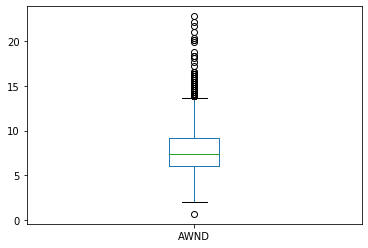

In [544]:
weather['AWND'].plot(kind='box')
plt.show()

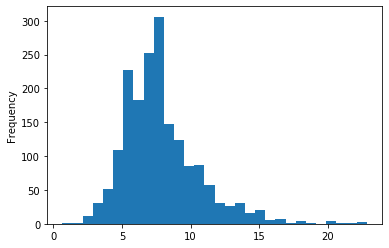

In [545]:
weather['AWND'].plot(kind = 'hist', bins=30)
plt.show()

### Examing temperature
Explore the temperature data to check for reliability. Temperature is measured in degrees Fahrenheit.

In [546]:
print(weather[['TAVG','TMAX','TMIN']].head())

   TAVG  TMAX  TMIN
0  28.0  38.0  18.0
1  33.0  50.0  16.0
2  43.0  55.0  31.0
3  42.5  58.0  27.0
4  50.5  66.0  35.0


In [547]:
# Create data frame 'weather_temp' only contains temperature data.
weather_temp = weather[['TAVG','TMAX', 'TMIN']]

In [548]:
weather_temp.head()

,TAVG,TMAX,TMIN
0,28.0,38.0,18.0
1,33.0,50.0,16.0
2,43.0,55.0,31.0
3,42.5,58.0,27.0
4,50.5,66.0,35.0


In [549]:
weather_temp.shape

(1826, 3)

In [550]:
print(weather[['TAVG','TMAX','TMIN']].describe())

              TAVG         TMAX         TMIN
count  1826.000000  1826.000000  1826.000000
mean     50.930632    64.488226    37.373038
std      17.798633    19.335963    17.032978
min      -7.500000     0.000000   -17.000000
25%      38.000000    51.000000    25.000000
50%      51.500000    66.000000    37.000000
75%      66.500000    81.000000    53.000000
max      82.000000   100.000000    67.000000


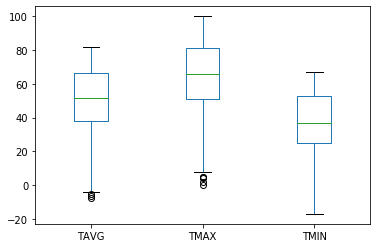

In [552]:
weather[['TAVG', 'TMAX', 'TMIN']].plot(kind = 'box')
plt.show()

### Counting bad weather conditions
The weather dataframe contains 8 columns that start with 'WT'. Each of those represents a bad weather condition. All the entries of those are either 0 or 1.